In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/NLP/project')
%cd '/content/drive/My Drive/NLP/project'

Mounted at /content/drive
/content/drive/My Drive/NLP/project


In [2]:
sys.path.append('/content/drive/MyDrive/NLP/project/MAMI DATASET')
sys.path.append('/content/drive/MyDrive/NLP/project/Discourse_Classifier/code')
sys.path.append('/content/drive/MyDrive/NLP/project/TRAINING')

In [3]:
!unzip '/content/drive/MyDrive/NLP/project/MAMI DATASET/training.zip'

Archive:  /content/drive/MyDrive/NLP/project/MAMI DATASET/training.zip
TRAINING/1.jpg exists and is a symbolic link with no real file.
replace TRAINING/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/project/TRAINING/training.csv',sep='\t')
df.to_csv('/content/drive/MyDrive/NLP/project/TRAINING/training.tsv', sep='\t')

In [4]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 3.2 MB/s 
     |████████████████████████████████| 59 kB 8.7 MB/s 
     |████████████████████████████████| 3.3 MB 54.7 MB/s 
     |████████████████████████████████| 895 kB 57.9 MB/s 
     |████████████████████████████████| 596 kB 66.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 4.0 MB/s 


In [6]:
!python '/content/drive/MyDrive/NLP/project/Discourse_Classifier/code/model_bert.py' --pred --out_file '/content/drive/MyDrive/NLP/project/Discourse_Classifier/tv_top_prob_preds.tsv' --resume_file '/content/drive/MyDrive/NLP/project/Discourse_Classifier/e19.ckpt' --cc_file '/content/drive/MyDrive/NLP/project/TRAINING/training.tsv' --cuda True --img_dir '/content/drive/MyDrive/NLP/project/TRAINING' 

Downloading: 100% 226k/226k [00:00<00:00, 2.38MB/s]
Downloading: 100% 28.0/28.0 [00:00<00:00, 41.8kB/s]
Downloading: 100% 455k/455k [00:00<00:00, 4.49MB/s]
Downloading: 100% 571/571 [00:00<00:00, 913kB/s]
Downloading: 100% 1.25G/1.25G [00:45<00:00, 29.9MB/s]
Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly id

In [33]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/project/Discourse_Classifier/tv_top_prob_preds.tsv',sep='\t')
df.to_csv('/content/drive/MyDrive/NLP/project/Discourse_Classifier/tv_top_prob_preds.tsv', sep='\t')
att_dict={}
for l in ['Meta','True', 'Action', 'Subjective', 'Story', 'Irrelevant']:
  
  # print(len(df[l].index))
  att_dict[l]=df[l].values.sum()/len(df[l].index)


print(att_dict)


{'Meta': 0.0146, 'True': 0.039, 'Action': 0.021, 'Subjective': 0.1699, 'Story': 0.7715, 'Irrelevant': 0.1133}


['Meta', 'True', 'Action', 'Subjective', 'Story', 'Irrelevant']


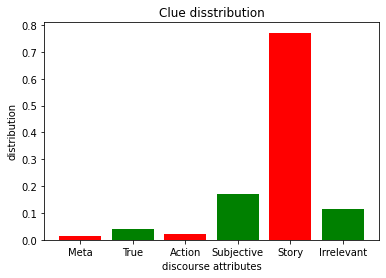

In [34]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = range(len(att_dict.keys()))
 
# heights of bars
height = att_dict.values()
 
# labels for bars
tick_label = list(att_dict.keys())
print(tick_label)
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('discourse attributes')
# naming the y-axis
plt.ylabel('distribution')
# plot title
plt.title('Clue disstribution')
 
# function to show the plot
plt.show()